In [37]:
pip install wordcloud

  Using cached wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl (168 kB)
Note: you may need to restart the kernel to use updated packages.


In [58]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns  # Import de Seaborn
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [4]:
#
dataset = pd.read_csv('/Users/benothmane/Desktop/Projet IA/fake_or_real_news.csv')
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
print(dataset.shape)

(6335, 4)


In [ ]:
print(dataset['title'].isnull())
print(dataset['text'].isnull())
print(dataset['label'].isnull())

In [8]:
list(dataset.columns)

['Unnamed: 0', 'title', 'text', 'label']

In [10]:
#
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
dataset.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [14]:
#Split the dataset into train and test sets
x = np.array(dataset['title'])
y = np.array(dataset['label'])
cv = CountVectorizer()
x = cv.fit_transform(x)

In [15]:
#diviser les données en entrainement et test ,ensuite utiliser la technique de  naive bayes por entrainement
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.8074191002367798


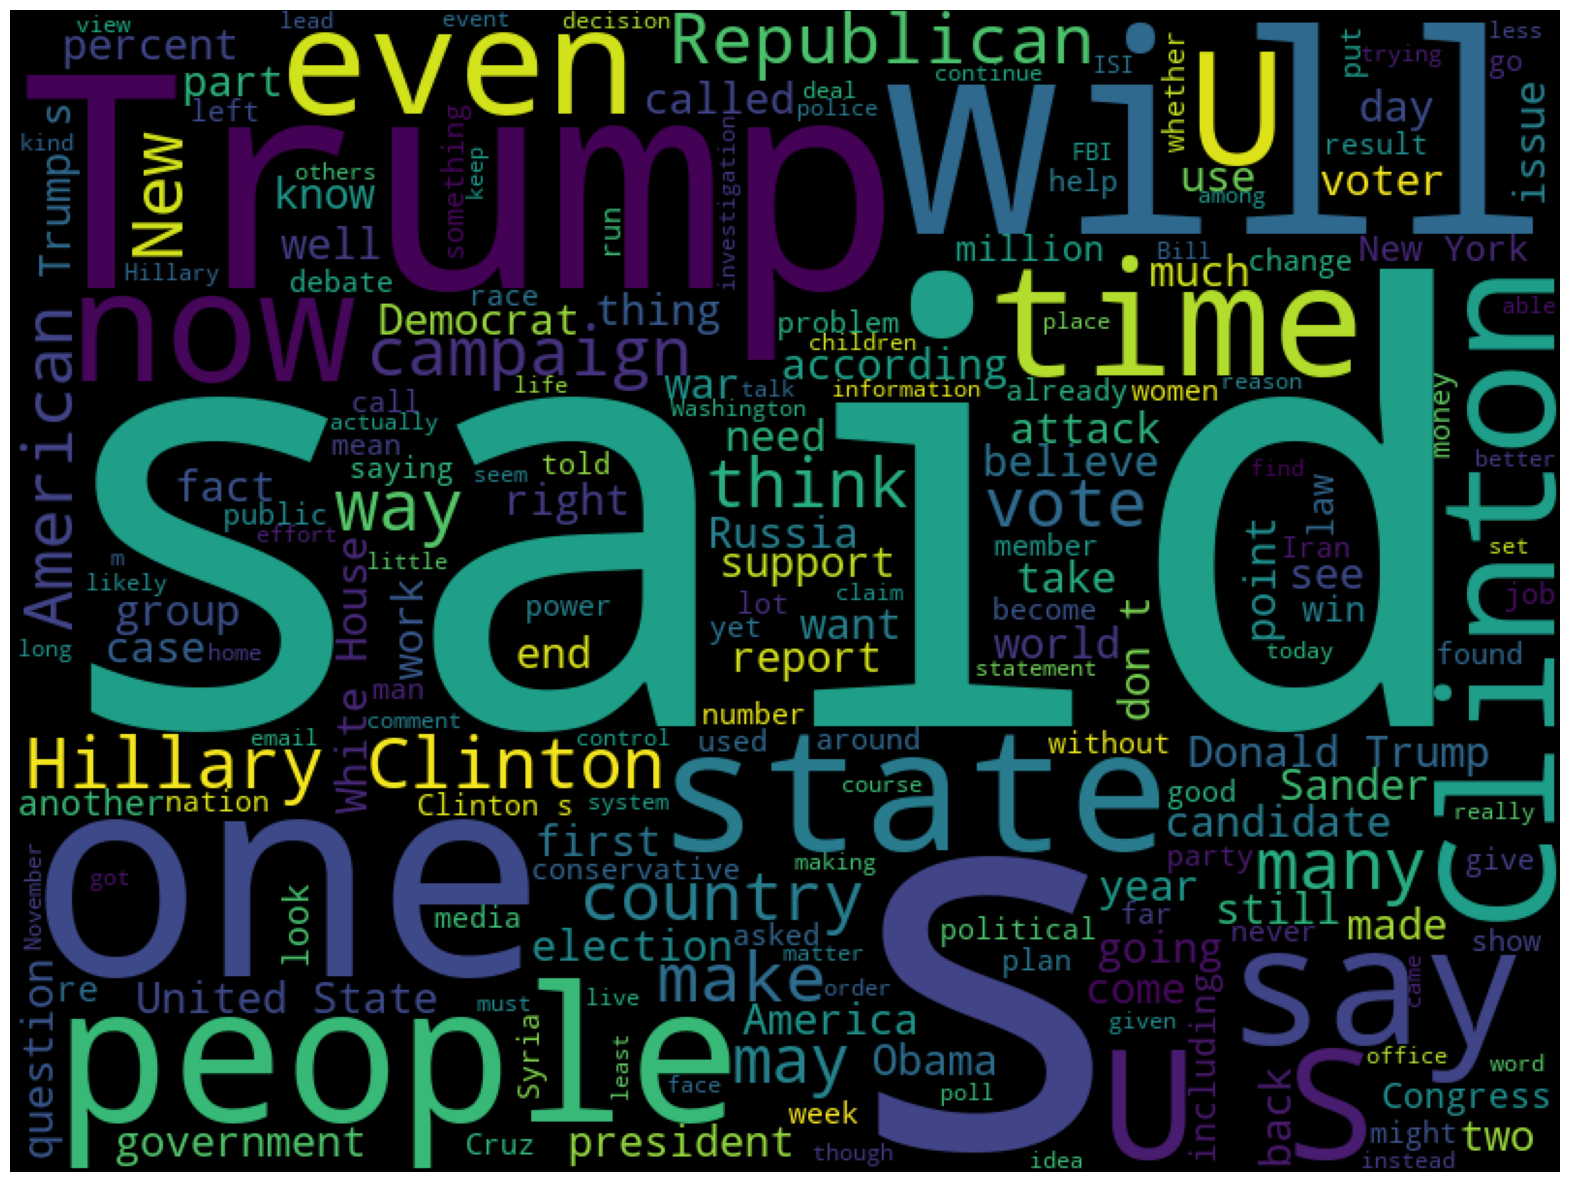

In [44]:
# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(dataset['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

In [66]:
# Supposons le  Dataset 'text' et 'label' for the labels
real_news = ' '.join(dataset[dataset['label'] == 'REAL']['text'])
fake_news = ' '.join(dataset[dataset['label'] == 'FAKE']['text'])


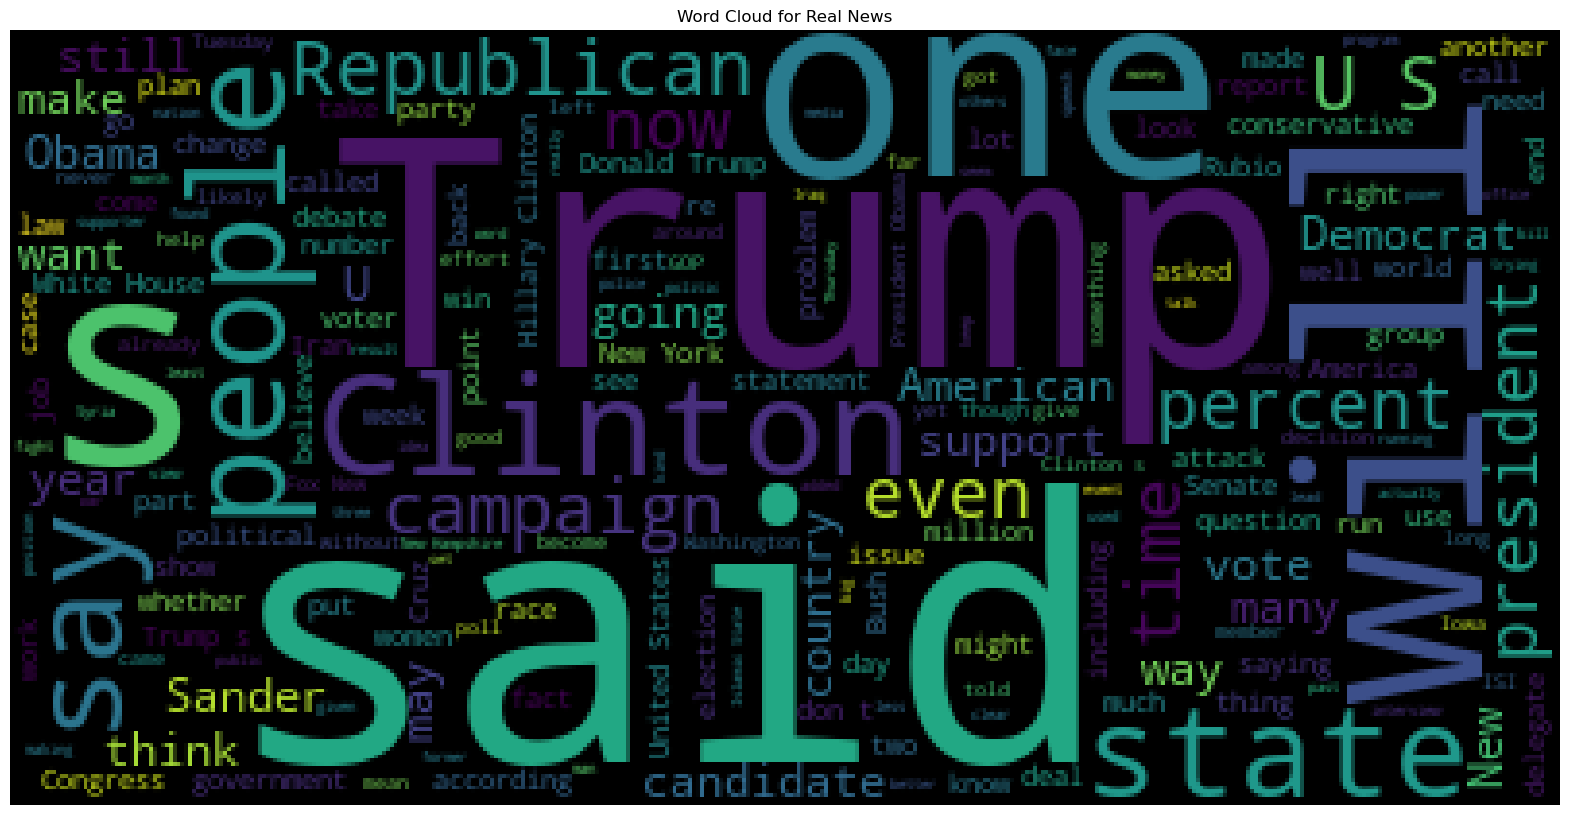

In [68]:
# Pour les vrai NEWS 
if len(real_news) > 0:
    wc_real = WordCloud().generate(real_news)
    plt.figure(figsize=(20, 30))
    plt.imshow(wc_real)
    plt.axis('off')
    plt.title('Word Cloud for Real News')
    plt.show()
else:
    print("No real news found.")

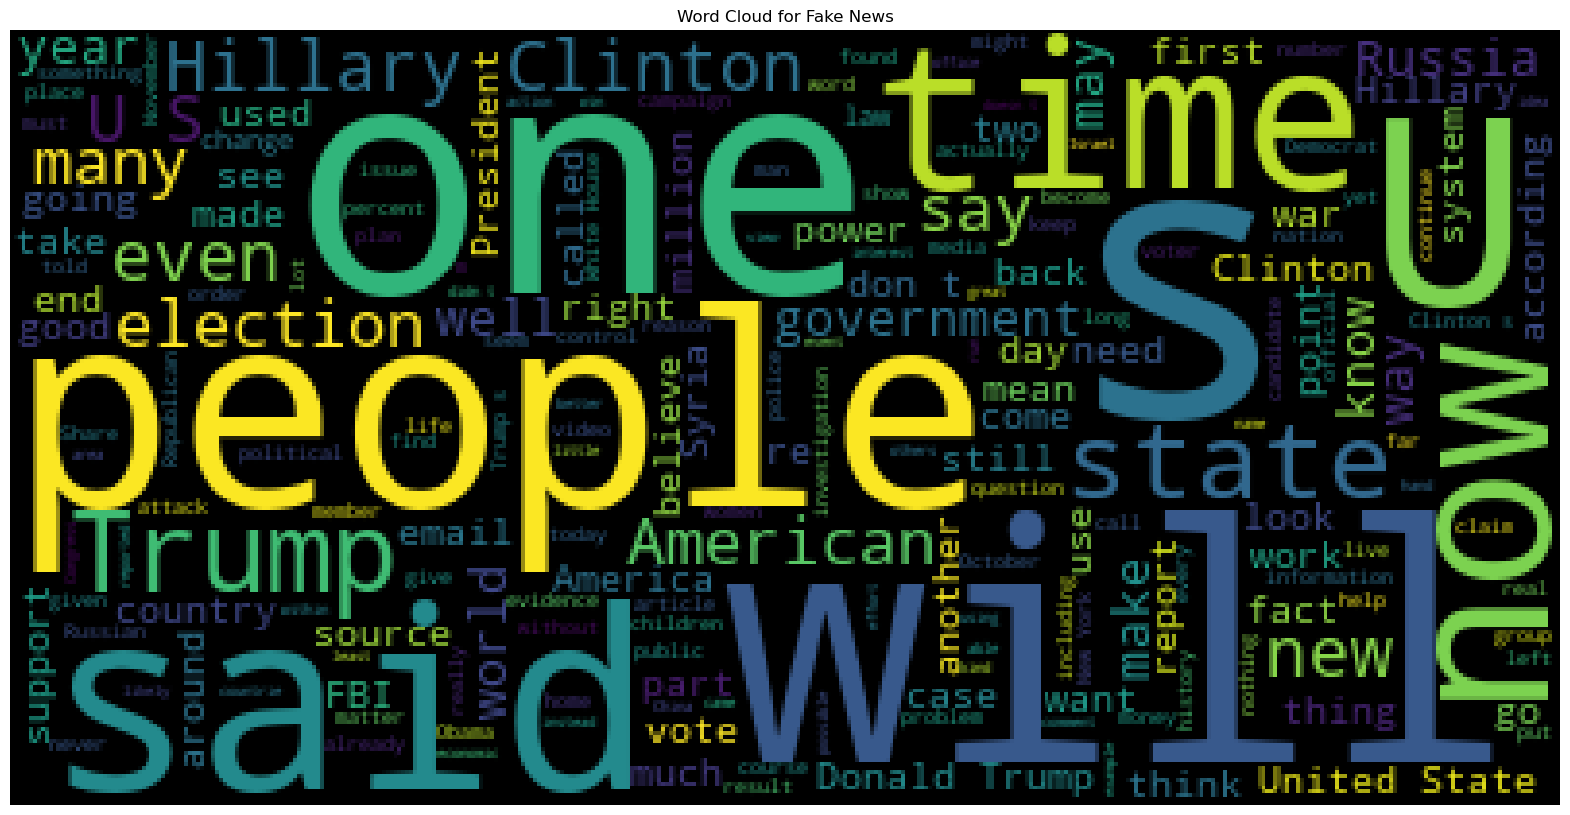

In [69]:
# Pour les fausse news
if len(fake_news) > 0:
    wc_fake = WordCloud().generate(fake_news)
    plt.figure(figsize=(20, 30))
    plt.imshow(wc_fake)
    plt.axis('off')
    plt.title('Word Cloud for Fake News')
    plt.show()
else:
    print("No fake news found.")

1: Unreliable
0: Reliable
Distribution of labels:
label
REAL    3171
FAKE    3164
Name: count, dtype: int64


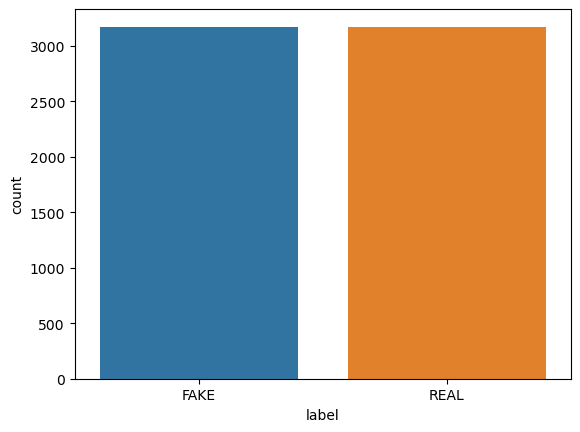

In [60]:
sns.countplot(x="label", data=dataset);
print("1: Unreliable")
print("0: Reliable")
print("Distribution of labels:")
print(dataset.label.value_counts());

In [70]:
#Testons le modèle, je vais simplement saisir n'importe quel titre d'actualité sur Google Actualités et voir si le modèle entraîné prédit s'il est vrai ou faux.

news_headline = 'Turbulent times at Tesla: Mass layoffs, slow sales and suspected arson'

data = cv.transform([news_headline]).toarray()
print(model.predict(data))

['REAL']


In [71]:
#Voyons si cela prédit que les fausses nouvelles sont fausses, je vais simplement taper un titre d'actualité au hasard.
news_headline = 'David Cameron’s former aide addresses rumours of former prime minister becoming Tory leader again'
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

['REAL']


In [ ]:
#Voyons si cela prédit que les fausses nouvelles sont fausses, je vais simplement taper un titre d'actualité au hasard.
news_headline = 'David Cameron’s former aide addresses rumours of former prime minister becoming Tory leader again'
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

In [ ]:
# Fonction pour prédire la véracité d'une nouvelle saisie par l'utilisateur
def predict_news():
    news_headline = input("Entrez le titre d'une nouvelle : ")
    data = cv.transform([news_headline]).toarray()
    prediction = model.predict(data)
    if prediction == 'fake':
        print("Fake News")
    else:
        print("Vrai News")

# Test du modèle avec les données d'exemple
predict_news()